

# Lab Assignment 2

## Austin Booth

Link:

### Exercise 3

,T1,T2,Q1,Q2
Time,,,,
0.00,25.346,25.088,0.0,0.0
10.02,25.378,25.088,0.0,0.0
20.00,25.346,25.088,0.0,0.0
30.00,25.410,25.088,60.0,0.0
40.01,25.410,25.088,60.0,0.0
...,...,...,...,...
1380.01,34.756,43.586,0.0,60.0
1390.00,34.466,43.135,0.0,60.0
1400.01,34.434,43.393,0.0,60.0


<AxesSubplot:xlabel='time / seconds'>

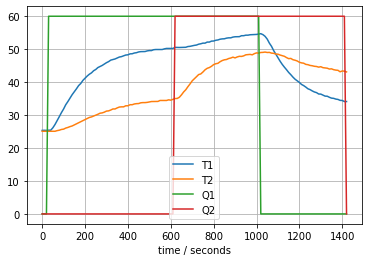

In [29]:
# make sure csv file reads and plots correctly

# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# create data file
expt_full = pd.read_csv('lab2data.csv')
expt = expt_full

# set time index
expt = expt.set_index("Time")
t_expt = expt.index

# display data in tabular format
display(expt)

# simple plotting
expt.plot(grid=True, xlabel="time / seconds")

In [30]:
# create truncated file with only the first 620 seconds
expt1 = expt.truncate(after=630)
display(expt1)

,T1,T2,Q1,Q2
Time,,,,
0.00,25.346,25.088,0.0,0.0
10.02,25.378,25.088,0.0,0.0
20.00,25.346,25.088,0.0,0.0
30.00,25.410,25.088,60.0,0.0
40.01,25.410,25.088,60.0,0.0
...,...,...,...,...
580.01,50.225,34.434,60.0,0.0
590.01,50.225,34.627,60.0,0.0
600.00,50.225,34.530,60.0,0.0


### Part 1: First-Order plus Delay, t up to 620 s

In [31]:
# define function to plot and compare two data sets
def plot_data(expt, pred):
    t_expt = expt.index
    
    # create a 3 x 1 grid of plot axes
    fig, ax = plt.subplots(3, 1, figsize=(10,8))
    
    # first plot axes
    ax[0].scatter(t_expt, expt["T1"], label="T1 expt", marker='.')
    ax[0].scatter(t_expt, expt["T2"], label="T2 expt", marker='.')
    ax[0].plot(t_expt, pred["T1"], label="T1 pred")
    ax[0].plot(t_expt, pred["T2"], label="T2 pred")
    ax[0].set_ylabel("deg C")
    ax[0].set_title("temperature response")

    # second plot axes
    ax[1].scatter(t_expt, expt["Q1"], label="Q1 expt", marker='.')
    ax[1].scatter(t_expt, expt["Q2"], label="Q2 expt", marker='.')
    ax[1].plot(t_expt, pred["Q1"], label="Q1 pred")
    ax[1].plot(t_expt, pred["Q2"], label="Q2 pred")
    ax[1].set_ylim([0, 100])
    ax[1].set_ylabel("percent")
    ax[1].set_title("heater power")
    
    # third plot axes
    ax[2].plot(t_expt, pred["T1"]-expt["T1"], label="T1 error")
    ax[2].plot(t_expt, pred["T2"]-expt["T2"], label="T1 error")
    ax[2].set_title("temperature prediction error")
    
    # things to do for every plot axes
    for a in ax:
        a.grid(True)
        a.set_xlabel("time / seconds")
        a.legend()
        
    plt.tight_layout()
    
    # return list of axes so to allow additional information to be added
    return ax

Time
0.00     -0.146000
10.02    -0.173429
20.00     2.065189
30.00     4.069772
40.01     6.006817
            ...   
580.01    8.493768
590.01    8.543230
600.00    8.589458
610.02    8.632833
620.01    8.351288
Name: T1, Length: 63, dtype: float64

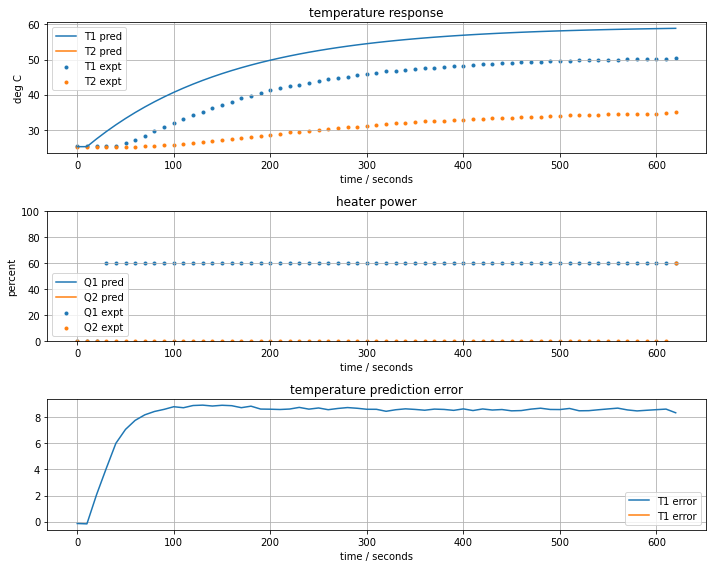

In [32]:
# set truncated file as experimental data for functions
expt = expt1

# parameter values and units
T_amb = 25.2                 # deg C; determined based on average of heaters' ambient T
u1bar = expt["Q1"].mean()
t_expt = expt.index

# adjustable parameters
K = 0.6
tau = 150
t_delay = 10

def model_first_order_delay(param, plot=False):
    K, tau, t_delay = param    
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = [T_amb + K*u1bar*(1 - np.exp(-(t-t_delay)/tau)) if t > t_delay else T_amb for t in t_expt]
    if plot:
        plot_data(expt, pred)
    return pred["T1"] - expt["T1"]
    
model_first_order_delay([K, tau, t_delay], True)

K = 0.45484434505558724,  tau = 159.9254276543216, time delay = 49.43582601929579


Time
0.00     -0.146000
10.02    -0.178000
20.00    -0.146000
30.00    -0.210000
40.01    -0.210000
            ...   
580.01    0.024228
590.01    0.081320
600.00    0.134898
610.02    0.185379
620.01   -0.089344
Name: T1, Length: 63, dtype: float64

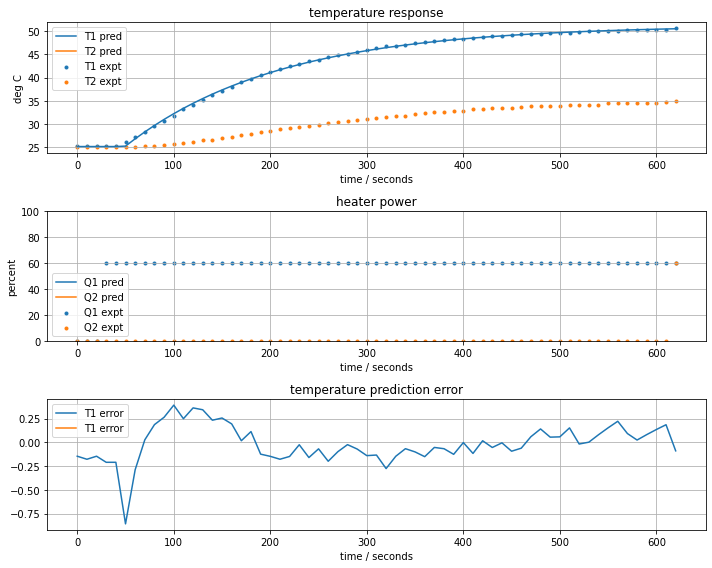

In [33]:
# optimize and report parameters using least squares
from scipy.optimize import least_squares
results = least_squares(model_first_order_delay,  [K, tau, t_delay])
K, tau, t_delay = results.x
print(f"K = {K},  tau = {tau}, time delay = {t_delay}")
model_first_order_delay(results.x, True)

#### Parameters for First-Order plus Delay Model
Gain: 0.455 degrees C / percent power

Time constant: 159.9 seconds

Time delay: 49.4 seconds



### Part 2: Fourth-Order Model

array([-0.146     , -0.178     , -0.1985856 ,  0.09048885,  1.45163233,
        2.57020204,  3.52297854,  4.20758011,  4.70076831,  5.02060388,
        5.32171372,  5.29303405,  5.44221916,  5.4052657 ,  5.24762651,
        5.19771117,  5.02409482,  4.69890343,  4.64034917,  4.25859789,
        4.10269542,  3.93356755,  3.78674732,  3.70857315,  3.39453404,
        3.34237227,  3.08317074,  3.01838319,  2.90337718,  2.69465383,
        2.50258607,  2.40174182,  2.11355001,  2.07037462,  2.00930412,
        1.88221891,  1.76101806,  1.74293333,  1.57245996,  1.38957989,
        1.44414218,  1.28710948,  1.32690254,  1.12414661,  1.07528559,
        0.93765963,  0.93232414,  0.96225113,  0.94526657,  0.79406682,
        0.76366245,  0.81529372,  0.56324721,  0.51067607,  0.54874964,
        0.60332532,  0.63326546,  0.42893306,  0.30076463,  0.33486883,
        0.38978647,  0.41868871,  0.09201528,  0.14060769,  0.21261407,
        0.31739472,  0.51313313,  0.71286436,  0.75268754,  0.97

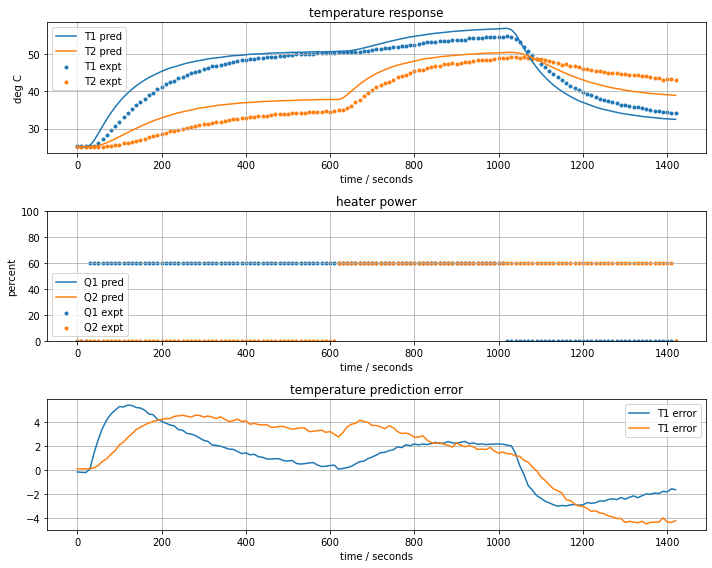

In [37]:
# reset experimental data to full csv file
expt = expt_full
expt = expt.set_index("Time")
t_expt = expt.index

# set up, define, and run fourth-order modeling function
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constant parameters
T_amb = 25.2             # deg C
P1 = 200               # P1 units
P2 = 100               # P2 units
alpha = 0.00016        # watts / (units P1 * percent U1)

# adjustable parameters
CpH = 5                # joules/deg C
CpS = 1                # joules/deg C
Ua = 0.05              # watts/deg C
Ub = 0.05              # watts/deg C
Uc = 0.05              # watts/deg C

# define u1 and u2 functions
# define function to set u1
def u1(t):
    if t <= 20:
        return 0
    elif t <= 1020:
        return 60
    else:
        return 0

# define function to set u2
def u2(t):
    if t <= 620:
        return 0
    elif t <= 1420:
        return 60
    else:
        return 0

# define and run fourth order model function
def model_energy_fourth_order(param, plot=False):
    # unpack the adjustable parameters
    CpH, CpS, Ua, Ub, Uc = param  

    # model solution
    def deriv(t, y):
        T1H, T1S, T2H, T2S= y
        dT1H = (-(Ua + Ub + Uc)*T1H + Ub*T1S + Uc*T2H + alpha*P1*u1(t) + Ua*T_amb)/CpH
        dT1S = Ub*(T1H - T1S)/CpS
        dT2H = (-(Ua + Ub + Uc)*T2H + Ub*T2S + Uc*T1H + alpha*P2*u2(t) + Ua*T_amb)/CpH
        dT2S = Ub*(T2H - T2S)/CpS
        return [dT1H, dT1S, dT2H, dT2S]

    soln = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb]*4, t_eval=t_expt) 
    
    # create dataframe with predictions
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = soln.y[1]
    pred["T2"] = soln.y[3]

    # plot solution
    if plot:
        ax = plot_data(expt, pred)
    
    err1 = np.array(pred["T1"] - expt["T1"])
    err2 = np.array(pred["T2"] - expt["T2"])
    
    return np.concatenate((err1, err2))
    
model_energy_fourth_order([CpH, CpS, Ua, Ub, Uc], plot=True)

CpH = 8.77382577396431,  CpS = 2.911037774848869,   Ua = 0.04951954627716709,  Ub = 0.2733552928982389,  Uc = 0.03870421981106926


array([-0.146     , -0.178     , -0.16460905,  0.05141673,  1.17479411,
        1.84156911,  2.16335845,  2.26777299,  2.21124427,  2.1028756 ,
        2.02957569,  1.65871231,  1.65699507,  1.53490858,  1.19191826,
        1.10331268,  0.88313874,  0.57570279,  0.55938852,  0.18028075,
        0.0988947 , -0.04378912, -0.12506762, -0.00941519, -0.2813441 ,
       -0.24084928, -0.34986809, -0.39841611, -0.29652981, -0.38631837,
       -0.52398466, -0.48200205, -0.70589369, -0.55573082, -0.51051336,
       -0.56346338, -0.57073212, -0.54163554, -0.51327642, -0.54209711,
       -0.4892469 , -0.50168687, -0.39549634, -0.47243284, -0.34698961,
       -0.48115853, -0.38758495, -0.27996959, -0.17400994, -0.2180905 ,
       -0.23947444, -0.07115178, -0.24058148, -0.23328564, -0.03659677,
       -0.0130521 ,  0.0929469 ,  0.04199948, -0.06668352,  0.06975778,
        0.10677882,  0.19494313, -0.04649779,  0.04582941,  0.12806431,
        0.19862518,  0.31806011,  0.41907417,  0.33593088,  0.42

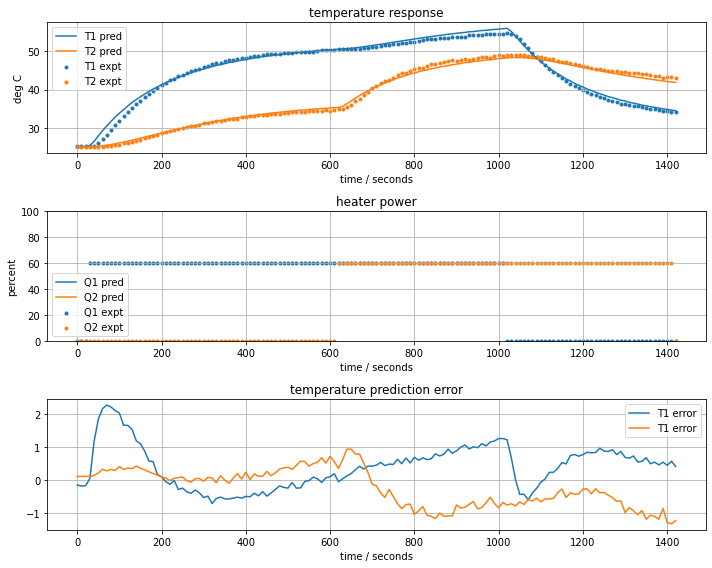

In [40]:
# optimize using least squares
results = least_squares(model_energy_fourth_order,  [CpH, CpS, Ua, Ub, Uc])
CpH, CpS, Ua, Ub, Uc = results.x
print(f"CpH = {CpH},  CpS = {CpS},   Ua = {Ua},  Ub = {Ub},  Uc = {Uc}")
model_energy_fourth_order(results.x, True)

#### Parameters for Fourth-Order Model
Heater heat capacity: 8.77 J/K

Sensor heat capacity: 2.91 J/K

Ua: 0.050 W/K

Ub: 0.273 W/K

Uc: 0.039 W/K